Alumno: Escobar Sánchez José Alejandro, 19170573

para la materia de Inteligencia Artificial

# Aplicar el algoritmo KNN al dataset de Iris

Para encontrar el mejor número de vecinos en el agrupamiento.

In [ ]:
import numpy as np
import pandas as pd

Importar el dataset cargado a mi Google Drive:

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Data/IRIS.csv')

Podemos ver la figura del dataset en filas y columnas y un ejemplo del contenido del dataset:

In [ ]:
dataset.shape

(150, 6)

In [ ]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Agrupamos el dataset por especies clasificadas:

In [ ]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Agregamos nuestros valores con features a 'X' y nuestros resultados esperados a 'y', debemos utilizar LabelEncoder para procesar los datos para que las cadenas de texto sean admitidas por sklearn:

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Se aplica el modelo train_test_split con los parámetros necesarios:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Podemos darnos una idea del agrupamiento utilizando gráficos:

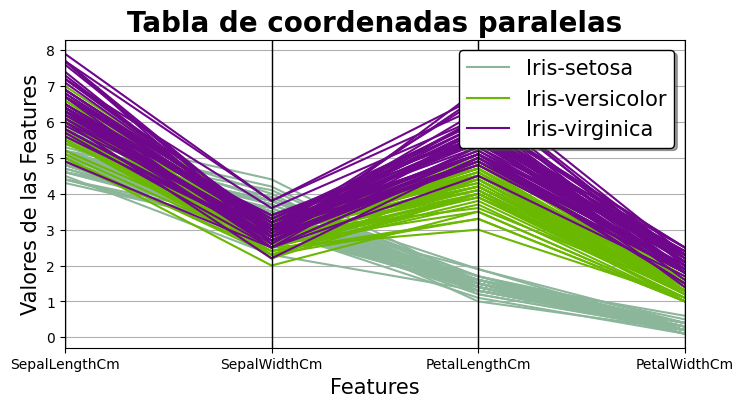

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8,4))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Tabla de coordenadas paralelas', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Valores de las Features', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Pairplot permite visualizar la distribución de una variable o su relación entre múltiples variables de forma separada dentro de categorías del dataset:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x400 with 0 Axes>

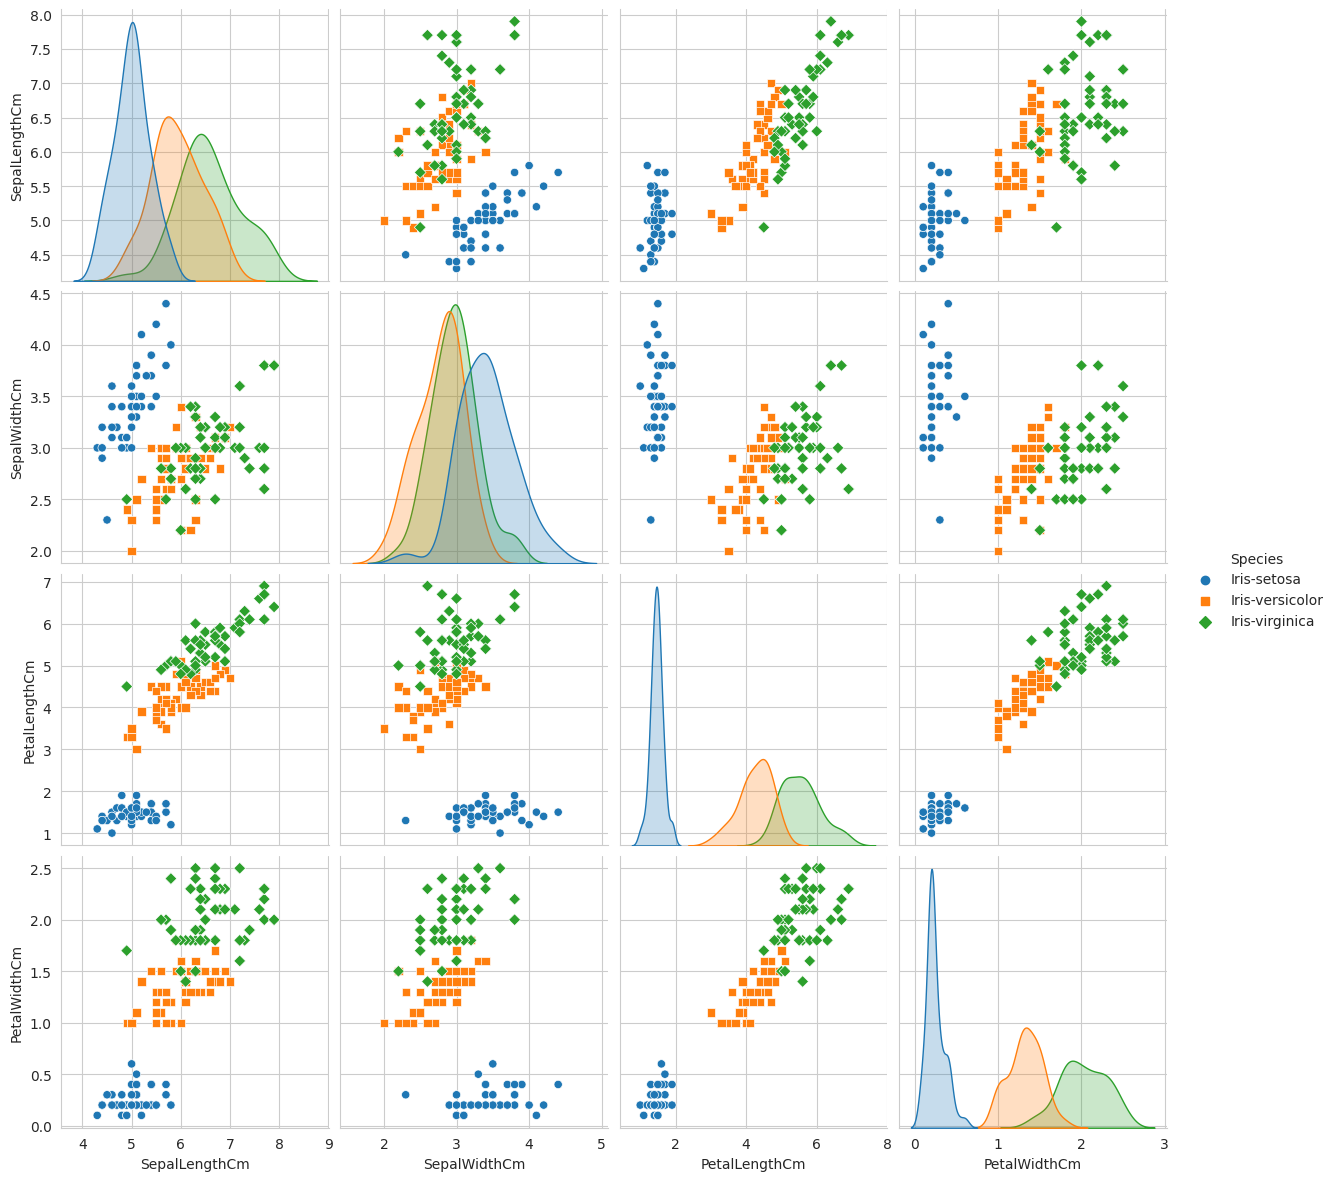

In [ ]:
plt.figure(figsize=(8, 4))
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

Utilizamos el clasificador K Neighbors de sklearn instanciado con 3 vecinos iniciales para obtener una predicción de la clasificación:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Utilizamos los datos de prueba y los datos de predicción para calcular la precisión del modelo:

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print('La precisión del modelo es de ' + str(round(accuracy, 2)) + ' %')

La precisión del modelo es de 96.67 %


Podemos realizar pruebas para encontrar un valor más óptimo de K para mejorar la precisión dle modelo y graficarlo:

In [ ]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

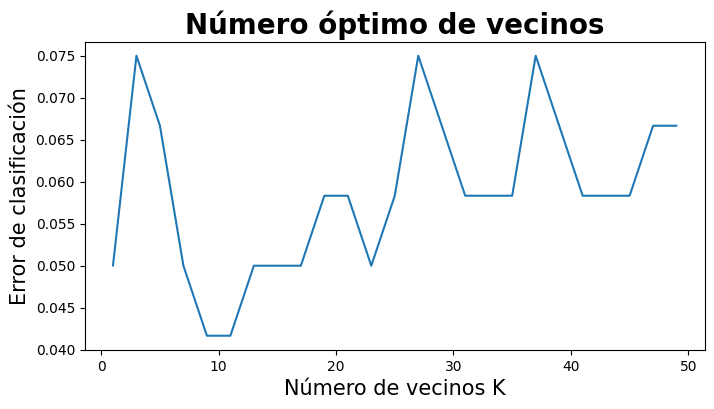

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(8,4))
plt.title('Número óptimo de vecinos', fontsize=20, fontweight='bold')
plt.xlabel('Número de vecinos K', fontsize=15)
plt.ylabel('Error de clasificación', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
best_k = k_list[MSE.index(min(MSE))]
print("El mejor valor de K es %d" % best_k)

El mejor valor de K es 9


Volvemos a instanciar el clasificador con un valor de K de 9:

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print('La nueva precisión del modelo es ' + str(round(accuracy, 2)) + ' %')

La nueva precisión del modelo es 100.0 %
